# Automobile Insurance Dataset

In [135]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [136]:
#Loading the dataset
df=pd.read_csv('Automobile_insurance_fraud.csv')
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [137]:
df.shape

(1000, 40)

In [138]:
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

Checking the missing values

In [139]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

In [140]:
#Drop _c39 column
df=df.drop(columns=['_c39'], axis=1)
df.shape

(1000, 39)

Here we remove _c39 column because all the values are NaN. Now again check the null values.

In [141]:
#Again check for missing values
df.isnull().values.any()

False

Observation

Here we see there are no null values but there is a '?' present in our dataset which is treated as null value.

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [143]:
#Replacing the question mark with NaN value
df=df.replace('?', np.NaN)
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,2,YES,71610,6510,13020,52080,Saab,92x,2004,Y
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,0,NaN,5070,780,780,3510,Mercedes,E400,2007,Y
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,3,NO,34650,7700,3850,23100,Dodge,RAM,2007,N
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,2,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,1,NO,6500,1300,650,4550,Accura,RSX,2009,N


In [144]:
#Checking for null value again
df.isnull().values.any()

True

Observation

Now it tells that nan value is present. Now we check the no of null values present in particular column and remove it.

In [145]:
df.isnull().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

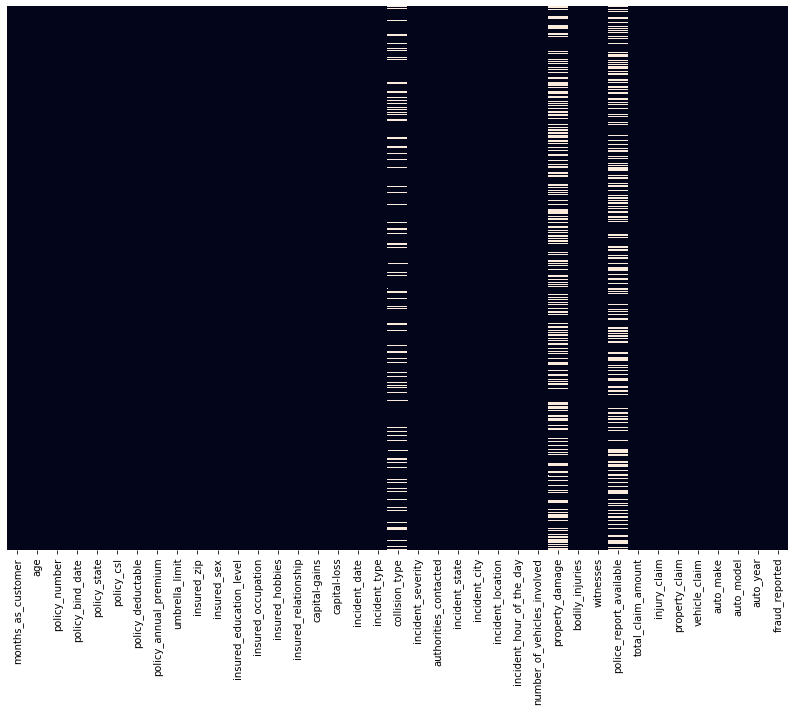

In [146]:
#Seeing the null values with the help of heat map

plt.figure(figsize=(14, 10))
sns.heatmap(df.isnull(),yticklabels=False, cbar=False)

In [147]:
#Imputing the missing value with mode

for col in ['collision_type', 'property_damage', 'police_report_available']:
    df[col].fillna(df[col].mode()[0], inplace=True)

In [148]:
df.isnull().values.any()

False

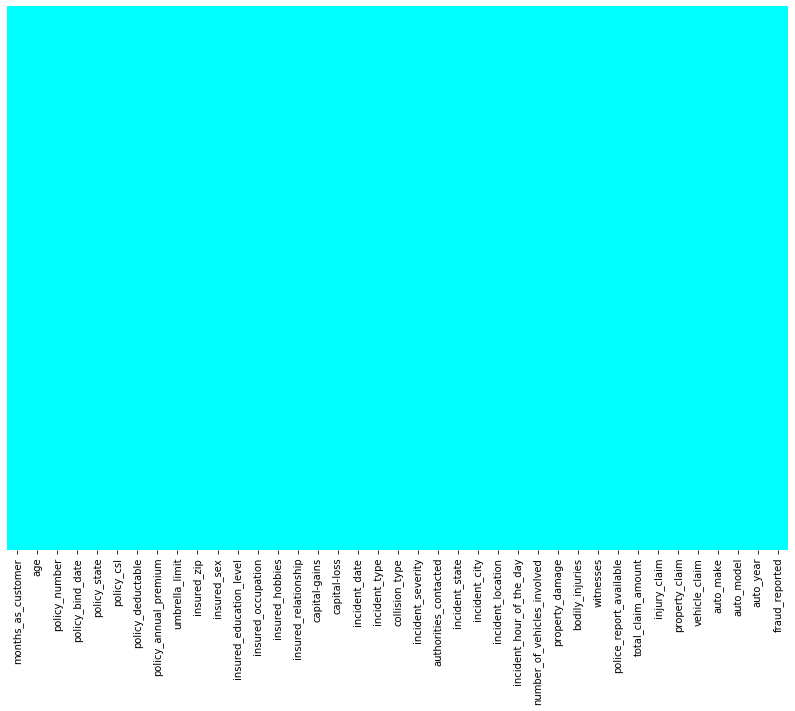

In [149]:
#seeing null value with heatmap

plt.figure(figsize=(14, 10))
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='cool')

Exploring the Catrgorical Columns

In [150]:
#Printing the object data type columns and their unique values

for column in df.columns:
    if df[column].dtypes==object:
        print(str(column)+ ' : ' +str(df[column].unique()))
        print(df[column].value_counts())
        print('***************************************************************************')
        print('\n')

policy_bind_date : ['17-10-2014' '27-06-2006' '06-09-2000' '25-05-1990' '06-06-2014'
 '12-10-2006' '04-06-2000' '03-02-1990' '05-02-1997' '25-07-2011'
 '26-05-2002' '29-05-1999' '20-11-1997' '26-10-2012' '28-12-1998'
 '19-10-1992' '08-06-2005' '15-11-2004' '28-12-2014' '02-08-1992'
 '25-06-2002' '27-11-2005' '27-05-1994' '08-02-1991' '02-02-1996'
 '05-12-2013' '20-09-1990' '18-07-2002' '08-02-1990' '04-03-2014'
 '18-02-2000' '19-06-2008' '01-08-2003' '04-04-1992' '13-01-1991'
 '08-08-2010' '09-03-2003' '03-02-1993' '25-11-2002' '27-07-1997'
 '08-05-1995' '30-08-2012' '30-04-2006' '13-04-2003' '05-12-2007'
 '21-08-2006' '08-01-1990' '18-03-1990' '07-01-2008' '10-03-1997'
 '10-01-2004' '20-08-1994' '02-06-2002' '28-04-1994' '17-08-2014'
 '11-08-2007' '20-11-2008' '18-10-1995' '19-05-1993' '26-02-2005'
 '14-02-1990' '30-09-1993' '10-06-2014' '28-10-2008' '24-04-2007'
 '13-12-1993' '17-08-2011' '20-08-1990' '11-02-1994' '22-02-1994'
 '15-08-2011' '11-11-1998' '04-12-1995' '28-12-2002' '15-

3770 Flute Drive       1
5053 Tree Drive        1
6939 3rd Hwy           1
1320 Flute Lane        1
6479 Francis Ave       1
                      ..
6409 Cherokee Drive    1
2087 Apache Ave        1
7756 Pine Hwy          1
2757 4th Hwy           1
9154 MLK Hwy           1
Name: incident_location, Length: 1000, dtype: int64
***************************************************************************


property_damage : ['YES' 'NO']
NO     698
YES    302
Name: property_damage, dtype: int64
***************************************************************************


police_report_available : ['YES' 'NO']
NO     686
YES    314
Name: police_report_available, dtype: int64
***************************************************************************


auto_make : ['Saab' 'Mercedes' 'Dodge' 'Chevrolet' 'Accura' 'Nissan' 'Audi' 'Toyota'
 'Ford' 'Suburu' 'BMW' 'Jeep' 'Honda' 'Volkswagen']
Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
BMW           72
Ford  

# For Analyzing the data with target i.e. fraud_reported we have to change income into numeric type.

In [151]:
#Changing the data type of target column.

df['fraud_reported']=df['fraud_reported'].map({'N' : 0, 'Y' : 1})
df['fraud_reported'].dtypes

dtype('int64')

In [152]:
df['fraud_reported'].value_counts()

0    753
1    247
Name: fraud_reported, dtype: int64

Observation

Out of 1000 report 247 are reported as fraud.

# Summary Statistics

In [153]:
#Checking the summary of the dataset

df.describe()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,546238.648000,1136.000000,1256.406150,1.101000e+06,501214.488000,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000,2005.103000,0.247000
std,115.113174,9.140287,257063.005276,611.864673,244.167395,2.297407e+06,71701.610941,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893,6.015861,0.431483
min,0.000000,19.000000,100804.000000,500.000000,433.330000,-1.000000e+06,430104.000000,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000,1995.000000,0.000000
25%,115.750000,32.000000,335980.250000,500.000000,1089.607500,0.000000e+00,448404.500000,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000,2000.000000,0.000000
50%,199.500000,38.000000,533135.000000,1000.000000,1257.200000,0.000000e+00,466445.500000,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000,2005.000000,0.000000
75%,276.250000,44.000000,759099.750000,2000.000000,1415.695000,0.000000e+00,603251.000000,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000,2010.000000,0.000000
max,479.000000,64.000000,999435.000000,2000.000000,2047.590000,1.000000e+07,620962.000000,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000,2015.000000,1.000000


Observation

1. Maximum month as a customer is 479.

2. Max age is 64 and min age is 19 years old.

3. Max vehicles involved in accidents is four and min is one.

4. Max two person get affected in accient.

5. Automobiles meet wuth an accident is manufactured in between year 1995 to 2015.

6. In months_as_customer, policy_number, policy_deductable, umbrella_limit, insured_zip, capital-gains, capital-loss, injury_claim, property_claim are right skewed data because mean is greater than median.

7. In total_claim_amount, vehicle_claim are Left skewed because median is greater than mean.

8. The difference between 75% amd max is higher in months_as_customer, policy_annual_premium, umbrella_limit, capital-gains, total_claim_amount, property_claim, vehicle_claim columns. So outliers are present in these columns with needs to removed.

# To check correlation.

In [154]:
df_cor=df.corr()
df_cor

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year,fraud_reported
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292,0.020544
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354,0.012143
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183,-0.029443
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105,0.014817
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226,-0.014480
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893,0.058622
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736,0.019368
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398,-0.019173
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368,0.004316


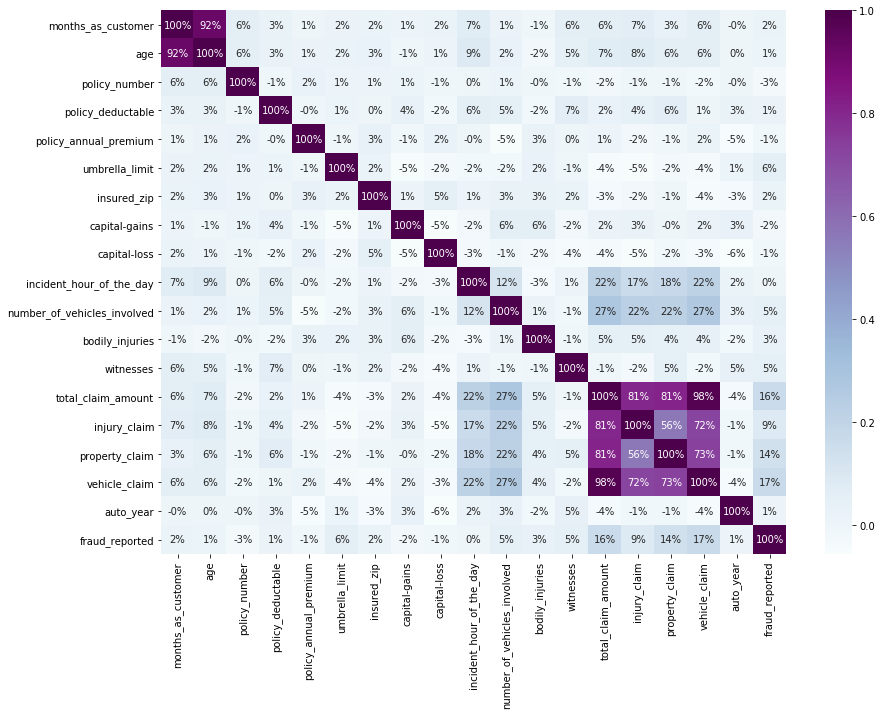

In [155]:
#Heatmap

plt.figure(figsize=(14, 10))
sns.heatmap(df_cor, annot=True, fmt='.0%', cmap='BuPu')
plt.show()

Observation

1. total_claim_amount, injury_claim, property_claim, vehicle_claim columns are highly correlated with each other.

2. months_as_customer and age is correlated with each other. So as a age of person increases the number of months as customer also increases.

# Correlation with target column i.e. is fraud_reported.

Text(0.5, 1.0, 'Correlation with target variable')

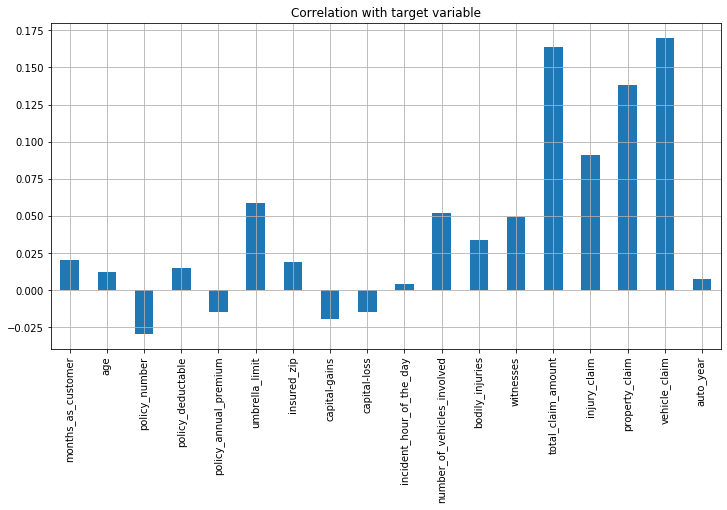

In [156]:
#Correlation with target column
plt.figure(figsize=(12, 6))
df.drop('fraud_reported', axis=1).corrwith(df['fraud_reported']).plot(kind='bar', grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target variable")

# Correlation with target column i.e. is fraud_reported

Text(0.5, 1.0, 'Correlation with target variable')

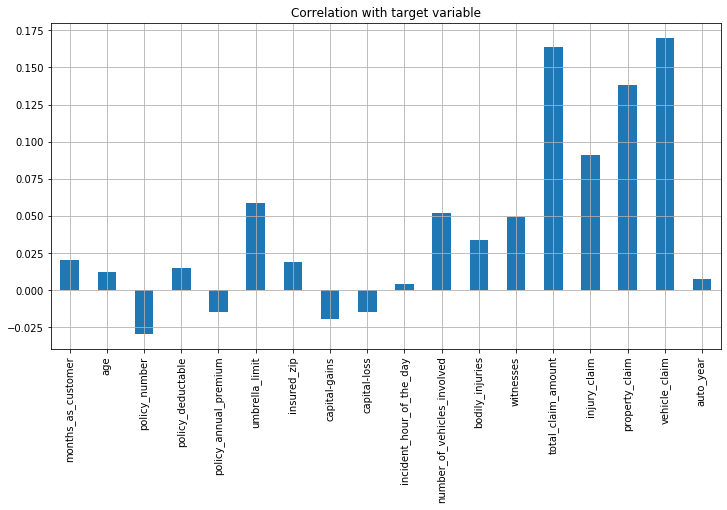

In [157]:
#Corrrelation with target column

plt.figure(figsize=(12,6))
df.drop("fraud_reported", axis=1).corrwith(df['fraud_reported']).plot(kind='bar', grid=True)
plt.xticks(rotation='vertical')
plt.title("Correlation with target variable")

Observation 

Here we see the correlation with target column. Only claiming columns are little bit higher correlated with target variable.

# Data Visualization

# Univariate Analysis

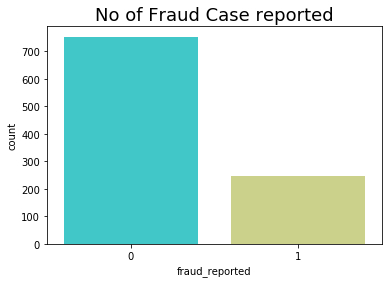

0    753
1    247
Name: fraud_reported, dtype: int64


In [158]:
#Checking the number of fraud cases.

sns.countplot(x='fraud_reported', data=df, palette='rainbow')
plt.title('No of Fraud Case reported', fontsize=18)
plt.show()

print(df['fraud_reported'].value_counts())

Observation

Out of 1000 cases only247 cases reported as fraud.

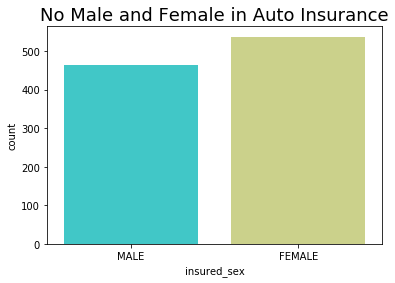

FEMALE    537
MALE      463
Name: insured_sex, dtype: int64


In [159]:
#Checking the number of male & female who took insurance

sns.countplot(x='insured_sex', data=df, palette='rainbow')
plt.title('No Male and Female in Auto Insurance', fontsize=18)
plt.show()

print(df['insured_sex'].value_counts())

Observation

In Auto Insurance Fraud datset 537 female had taken insurance and 463 male takes had taken insurance.

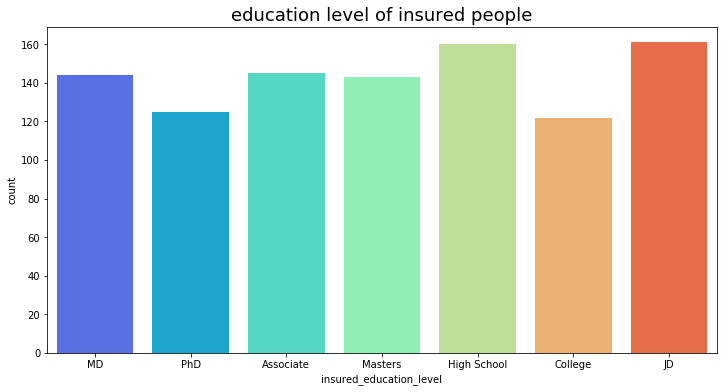

JD             161
High School    160
Associate      145
MD             144
Masters        143
PhD            125
College        122
Name: insured_education_level, dtype: int64


In [160]:
#Checking the education level of insured people

plt.figure(figsize=(12,6))
sns.countplot(x='insured_education_level', data=df, palette='rainbow')
plt.title('education level of insured people', fontsize=18)
plt.show()

print(df['insured_education_level'].value_counts())

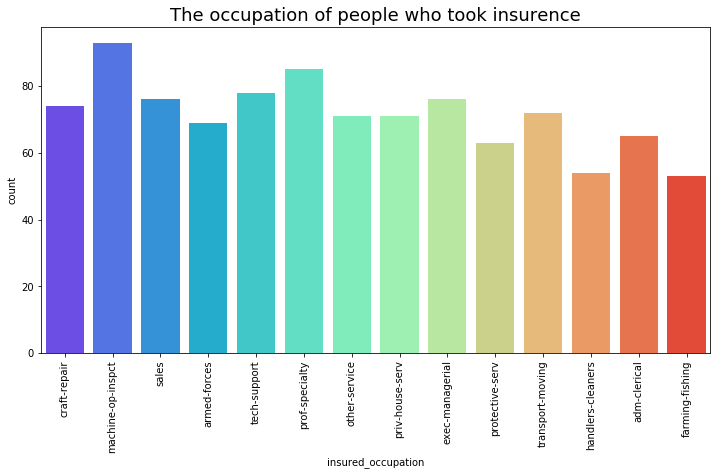

machine-op-inspct    93
prof-specialty       85
tech-support         78
sales                76
exec-managerial      76
craft-repair         74
transport-moving     72
priv-house-serv      71
other-service        71
armed-forces         69
adm-clerical         65
protective-serv      63
handlers-cleaners    54
farming-fishing      53
Name: insured_occupation, dtype: int64


In [161]:
#checking The occupation of people who took insurence

plt.figure(figsize=(12,6))
sns.countplot(x='insured_occupation', data=df, palette='rainbow')
plt.title('The occupation of people who took insurence', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

print(df['insured_occupation'].value_counts())

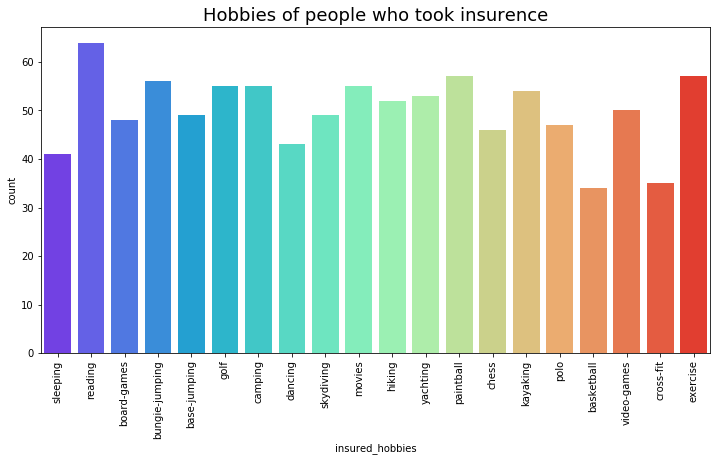

reading           64
exercise          57
paintball         57
bungie-jumping    56
camping           55
movies            55
golf              55
kayaking          54
yachting          53
hiking            52
video-games       50
skydiving         49
base-jumping      49
board-games       48
polo              47
chess             46
dancing           43
sleeping          41
cross-fit         35
basketball        34
Name: insured_hobbies, dtype: int64


In [162]:
#checking The Hobbies of people

plt.figure(figsize=(12,6))
sns.countplot(x='insured_hobbies', data=df, palette='rainbow')
plt.title('Hobbies of people who took insurence', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

print(df['insured_hobbies'].value_counts())

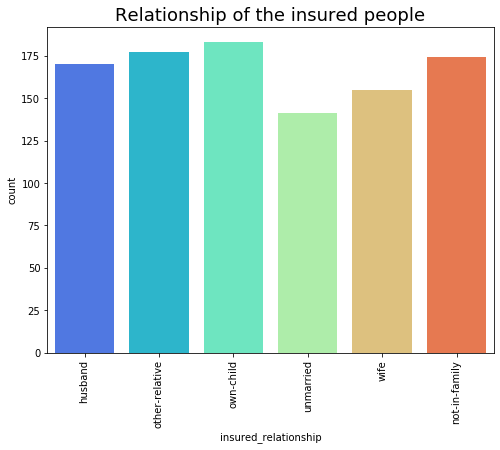

own-child         183
other-relative    177
not-in-family     174
husband           170
wife              155
unmarried         141
Name: insured_relationship, dtype: int64


In [163]:
#Checking relationship

plt.figure(figsize=(8,6))
sns.countplot(x='insured_relationship', data=df, palette='rainbow')
plt.title('Relationship of the insured people', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

print(df['insured_relationship'].value_counts())

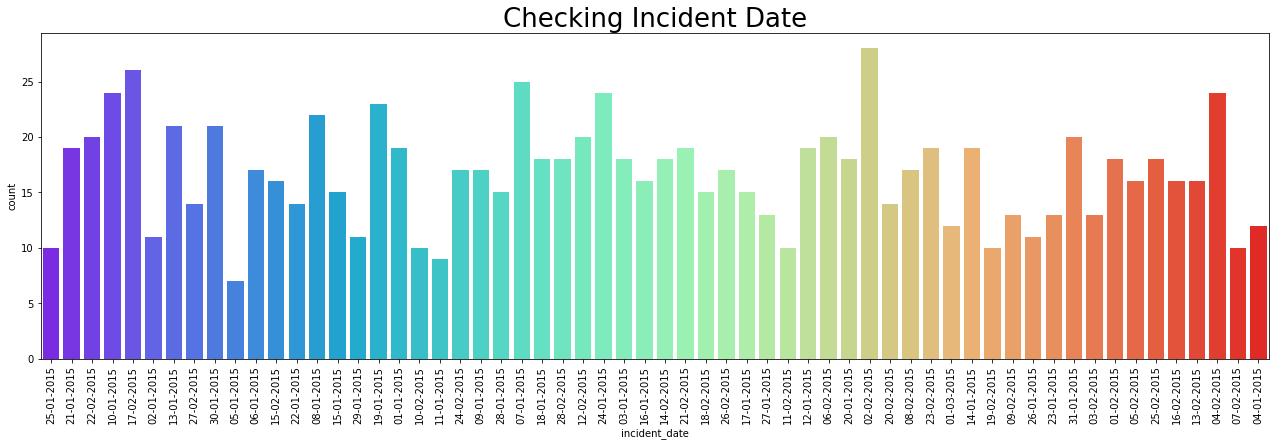

02-02-2015    28
17-02-2015    26
07-01-2015    25
04-02-2015    24
10-01-2015    24
24-01-2015    24
19-01-2015    23
08-01-2015    22
13-01-2015    21
30-01-2015    21
06-02-2015    20
22-02-2015    20
31-01-2015    20
12-02-2015    20
01-01-2015    19
23-02-2015    19
14-01-2015    19
21-01-2015    19
12-01-2015    19
21-02-2015    19
28-02-2015    18
18-01-2015    18
01-02-2015    18
14-02-2015    18
25-02-2015    18
03-01-2015    18
20-01-2015    18
08-02-2015    17
24-02-2015    17
09-01-2015    17
06-01-2015    17
26-02-2015    17
13-02-2015    16
16-01-2015    16
15-02-2015    16
16-02-2015    16
05-02-2015    16
18-02-2015    15
15-01-2015    15
17-01-2015    15
28-01-2015    15
20-02-2015    14
22-01-2015    14
27-02-2015    14
03-02-2015    13
27-01-2015    13
23-01-2015    13
09-02-2015    13
04-01-2015    12
01-03-2015    12
26-01-2015    11
02-01-2015    11
29-01-2015    11
10-02-2015    10
19-02-2015    10
25-01-2015    10
11-02-2015    10
07-02-2015    10
11-01-2015    

In [164]:
#checking Checking Incident Date

plt.figure(figsize=(22,6))
sns.countplot(x='incident_date', data=df, palette='rainbow')
plt.title('Checking Incident Date', fontsize=26)
plt.xticks(rotation='vertical')
plt.show()

print(df['incident_date'].value_counts())

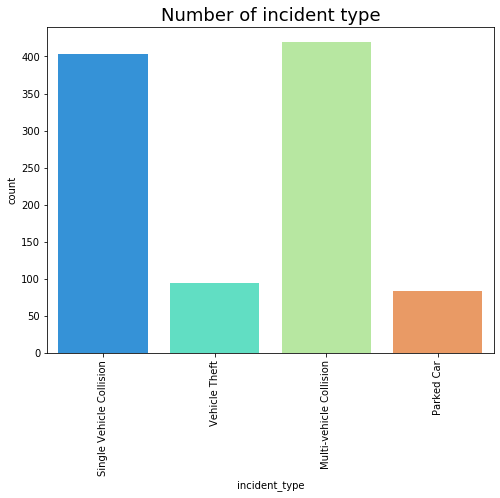

Multi-vehicle Collision     419
Single Vehicle Collision    403
Vehicle Theft                94
Parked Car                   84
Name: incident_type, dtype: int64


In [165]:
#Checking incident type

plt.figure(figsize=(8,6))
sns.countplot(x='incident_type', data=df, palette='rainbow')
plt.title('Number of incident type', fontsize=18)
plt.xticks(rotation='vertical')
plt.show()

print(df['incident_type'].value_counts())

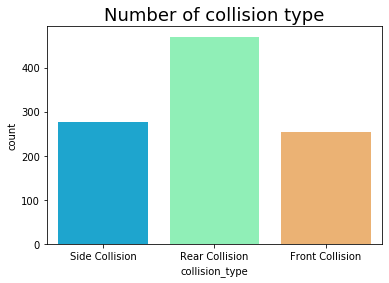

Rear Collision     470
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64


In [166]:
#Checking collision_type

sns.countplot(x='collision_type', data=df, palette='rainbow')
plt.title('Number of collision type', fontsize=18)
plt.show()

print(df['collision_type'].value_counts())

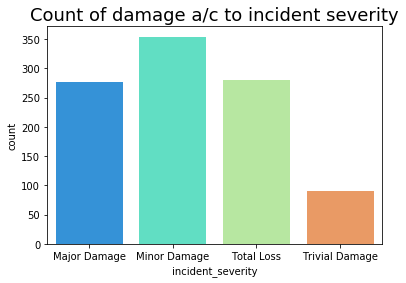

Minor Damage      354
Total Loss        280
Major Damage      276
Trivial Damage     90
Name: incident_severity, dtype: int64


In [167]:
#Checking incident_severity

sns.countplot(x='incident_severity', data=df, palette='rainbow')
plt.title('Count of damage a/c to incident severity', fontsize=18)
plt.show()

print(df['incident_severity'].value_counts())

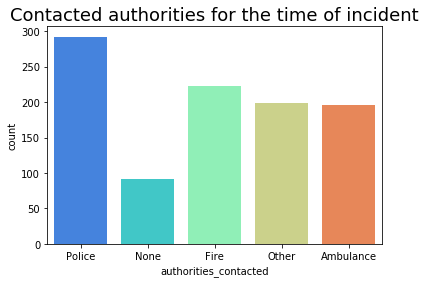

Police       292
Fire         223
Other        198
Ambulance    196
None          91
Name: authorities_contacted, dtype: int64


In [168]:
#Checking authorities_contacted for the time of incident

sns.countplot(x='authorities_contacted', data=df, palette='rainbow')
plt.title('Contacted authorities for the time of incident', fontsize=18)
plt.show()

print(df['authorities_contacted'].value_counts())

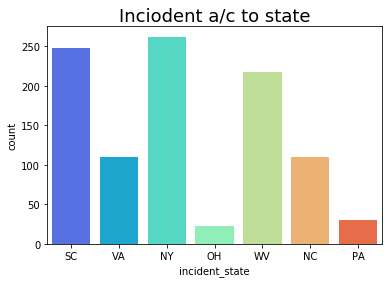

NY    262
SC    248
WV    217
NC    110
VA    110
PA     30
OH     23
Name: incident_state, dtype: int64


In [169]:
#Checking number of inciodent a/c to state

sns.countplot(x='incident_state', data=df, palette='rainbow')
plt.title('Inciodent a/c to state', fontsize=18)
plt.show()

print(df['incident_state'].value_counts())

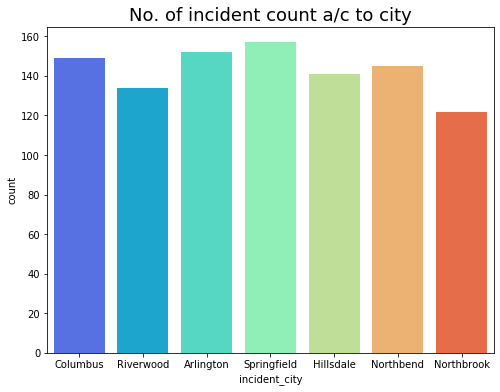

Springfield    157
Arlington      152
Columbus       149
Northbend      145
Hillsdale      141
Riverwood      134
Northbrook     122
Name: incident_city, dtype: int64


In [170]:
#Checking number of fraud cases

plt.figure(figsize=(8,6))
sns.countplot(x='incident_city', data=df, palette='rainbow')
plt.title('No. of incident count a/c to city', fontsize=18)
plt.show()

print(df['incident_city'].value_counts())

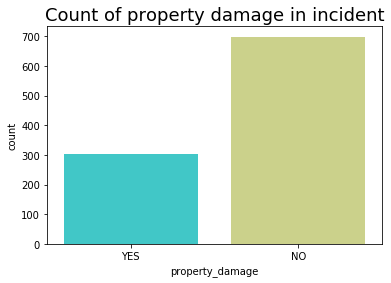

NO     698
YES    302
Name: property_damage, dtype: int64


In [171]:
#Checking number of times property damage in incident

sns.countplot(x='property_damage', data=df, palette='rainbow')
plt.title('Count of property damage in incident', fontsize=18)
plt.show()

print(df['property_damage'].value_counts())

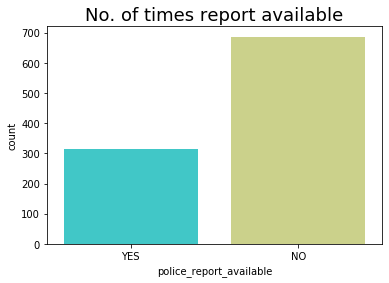

NO     686
YES    314
Name: police_report_available, dtype: int64


In [172]:
#Checking number of times property damage in incident

sns.countplot(x='police_report_available', data=df, palette='rainbow')
plt.title('No. of times report available', fontsize=18)
plt.show()

print(df['police_report_available'].value_counts())

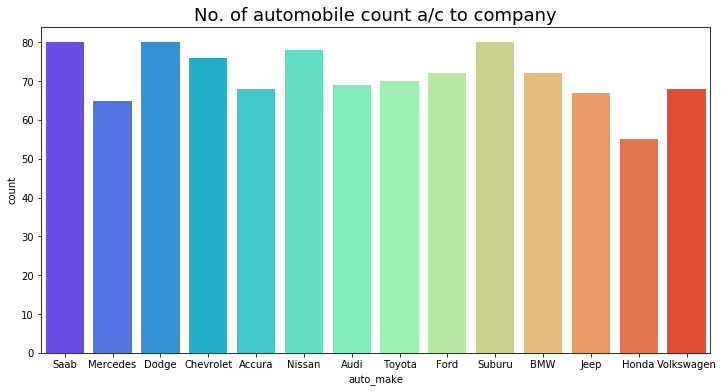

Dodge         80
Suburu        80
Saab          80
Nissan        78
Chevrolet     76
BMW           72
Ford          72
Toyota        70
Audi          69
Volkswagen    68
Accura        68
Jeep          67
Mercedes      65
Honda         55
Name: auto_make, dtype: int64


In [173]:
#Checking the number of automobile company

plt.figure(figsize=(12, 6))
sns.countplot(x='auto_make', data=df, palette='rainbow')
plt.title('No. of automobile count a/c to company', fontsize=18)
plt.show()

print(df['auto_make'].value_counts())

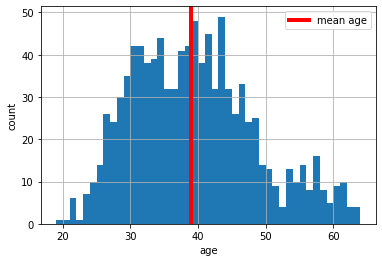

In [174]:
#Checking the mean of age group of people who took insurence

ages=df['age'].hist(bins=max(df['age']-min(df['age'])))
mean_val=np.mean(df['age'])
plt.axvline(mean_val, linewidth=4, color='red', label='mean age')
plt.xlabel('age')
plt.ylabel('count')
plt.legend()
plt.show()

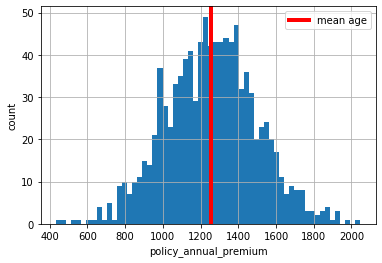

In [175]:
#Checking the mean of policy_annual_premium

policy_annual_premium=df['policy_annual_premium'].hist(bins=60)
mean_val=np.mean(df['policy_annual_premium'])
plt.axvline(mean_val, linewidth=4, color='red', label='mean age')
plt.xlabel('policy_annual_premium')
plt.ylabel('count')
plt.legend()
plt.show()

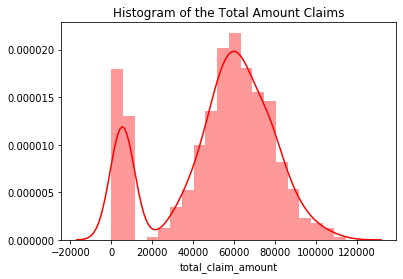

In [176]:
#Histogram of the total amount claim

sns.distplot(df['total_claim_amount'], color='r')
plt.title('Histogram of the Total Amount Claims')
plt.show()

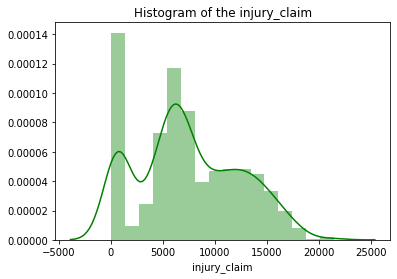

In [177]:
#Histogram of the total injury_claim

sns.distplot(df['injury_claim'], color='g')
plt.title('Histogram of the injury_claim')
plt.show()

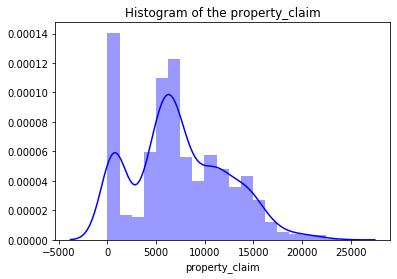

In [178]:
#Histogram of the property_claim

sns.distplot(df['property_claim'], color='b')
plt.title('Histogram of the property_claim')
plt.show()

From the two graph it is clearly shown that property claim and injury claim are right skewed.

# Bivariate Analysis

Our feature variable of interest is fraud_reported

It refers to the fraud cases

we already change it in integer valued as it contains only two number 0 & 1

1.stands for Yes Fraud

0.stands for No Fraud

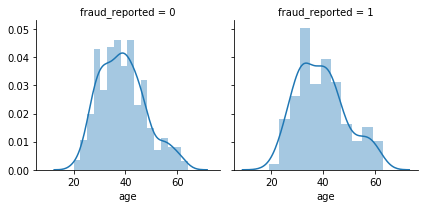

In [179]:
#Exploring Age vs Income via Facegrid
facet=sns.FacetGrid(df, col='fraud_reported')
facet.map(sns.distplot, 'age')
plt.show()

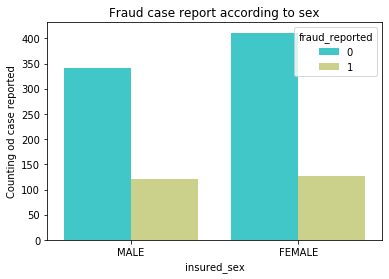

insured_sex  fraud_reported
FEMALE       0                 411
             1                 126
MALE         0                 342
             1                 121
Name: fraud_reported, dtype: int64


In [180]:
#Insured sex vs Fraud case reported

sns.countplot(x='insured_sex', hue ='fraud_reported', data=df, palette='rainbow')
plt.title('Fraud case report according to sex')
plt.ylabel('Counting od case reported')
plt.show()

print(df.groupby('insured_sex')['fraud_reported'].value_counts())

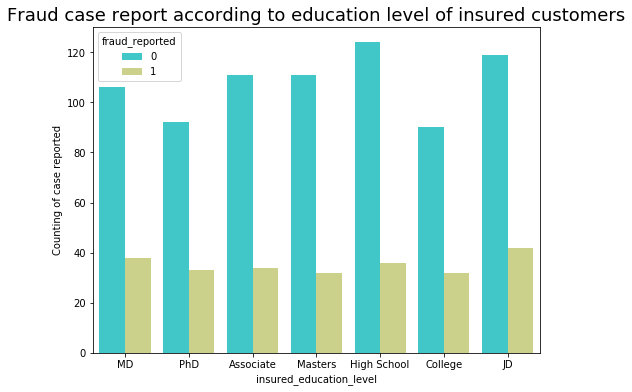

insured_education_level  fraud_reported
Associate                0                 111
                         1                  34
College                  0                  90
                         1                  32
High School              0                 124
                         1                  36
JD                       0                 119
                         1                  42
MD                       0                 106
                         1                  38
Masters                  0                 111
                         1                  32
PhD                      0                  92
                         1                  33
Name: fraud_reported, dtype: int64


In [181]:
#Insured education level vs Fraud case reported

plt.figure(figsize=(8, 6))
sns.countplot(x='insured_education_level', hue='fraud_reported', data=df, palette='rainbow')
plt.title("Fraud case report according to education level of insured customers", fontsize=18)
plt.ylabel("Counting of case reported")
plt.show()

print(df.groupby('insured_education_level')['fraud_reported'].value_counts())

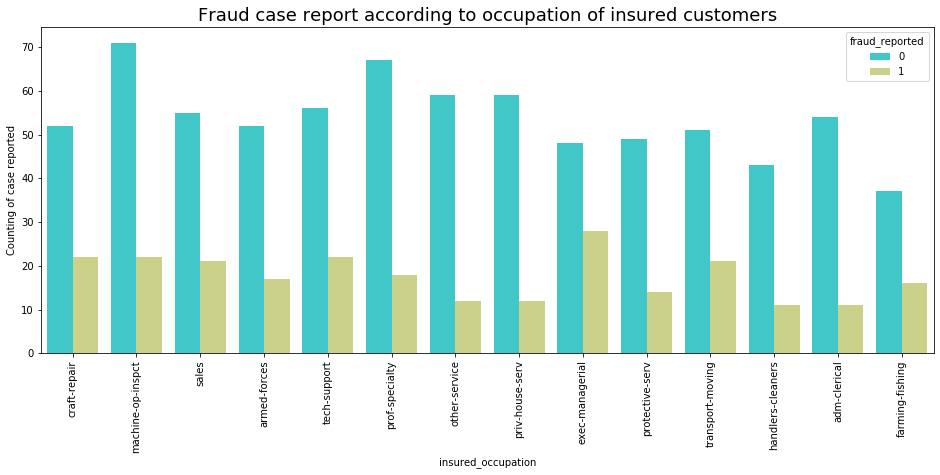

insured_occupation  fraud_reported
adm-clerical        0                 54
                    1                 11
armed-forces        0                 52
                    1                 17
craft-repair        0                 52
                    1                 22
exec-managerial     0                 48
                    1                 28
farming-fishing     0                 37
                    1                 16
handlers-cleaners   0                 43
                    1                 11
machine-op-inspct   0                 71
                    1                 22
other-service       0                 59
                    1                 12
priv-house-serv     0                 59
                    1                 12
prof-specialty      0                 67
                    1                 18
protective-serv     0                 49
                    1                 14
sales               0                 55
                    1 

In [182]:
#Insured education level vs Fraud case reported

plt.figure(figsize=(16, 6))
sns.countplot(x='insured_occupation', hue='fraud_reported', data=df, palette='rainbow')
plt.title("Fraud case report according to occupation of insured customers", fontsize=18)
plt.ylabel("Counting of case reported")
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('insured_occupation')['fraud_reported'].value_counts())

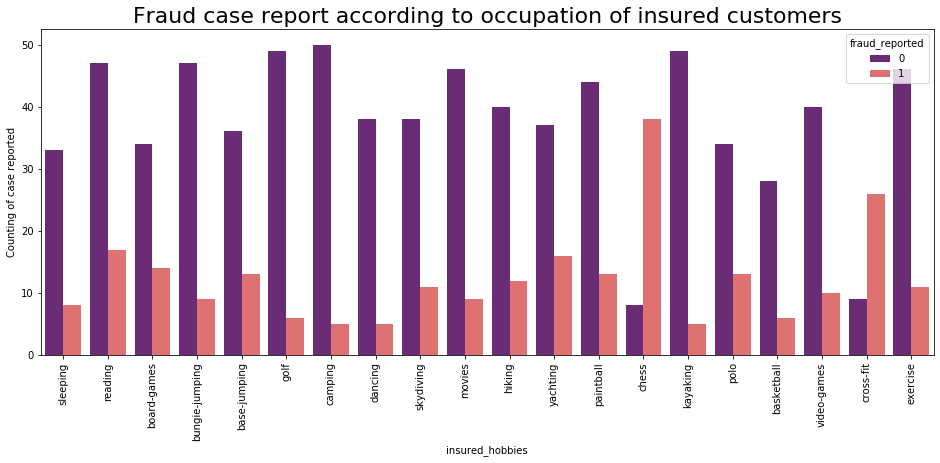

insured_hobbies  fraud_reported
base-jumping     0                 36
                 1                 13
basketball       0                 28
                 1                  6
board-games      0                 34
                 1                 14
bungie-jumping   0                 47
                 1                  9
camping          0                 50
                 1                  5
chess            1                 38
                 0                  8
cross-fit        1                 26
                 0                  9
dancing          0                 38
                 1                  5
exercise         0                 46
                 1                 11
golf             0                 49
                 1                  6
hiking           0                 40
                 1                 12
kayaking         0                 49
                 1                  5
movies           0                 46
                 1

In [183]:
#insured_hobbies vs Fraud case reported

plt.figure(figsize=(16, 6))
sns.countplot(x='insured_hobbies', hue='fraud_reported', data=df, palette='magma')
plt.title("Fraud case report according to occupation of insured customers", fontsize=22)
plt.ylabel("Counting of case reported")
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('insured_hobbies')['fraud_reported'].value_counts())

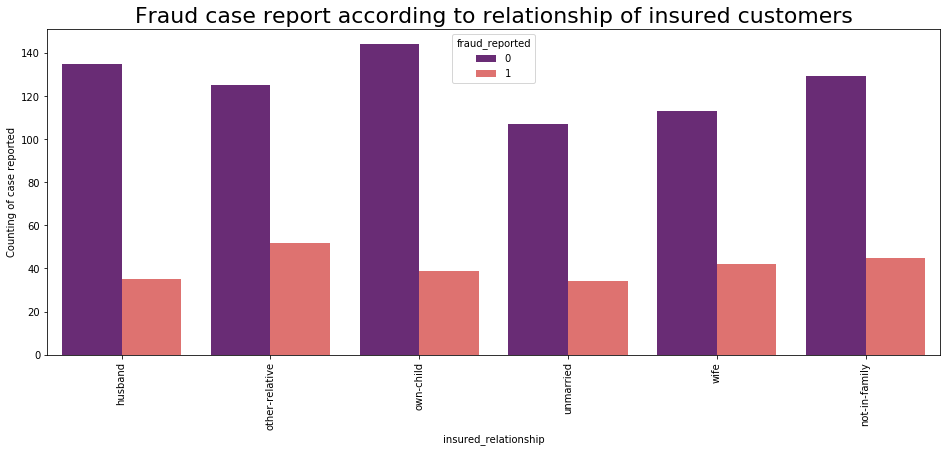

insured_relationship  fraud_reported
husband               0                 135
                      1                  35
not-in-family         0                 129
                      1                  45
other-relative        0                 125
                      1                  52
own-child             0                 144
                      1                  39
unmarried             0                 107
                      1                  34
wife                  0                 113
                      1                  42
Name: fraud_reported, dtype: int64


In [184]:
#insured_relationship vs Fraud case reported

plt.figure(figsize=(16, 6))
sns.countplot(x='insured_relationship', hue='fraud_reported', data=df, palette='magma')
plt.title("Fraud case report according to relationship of insured customers", fontsize=22)
plt.ylabel("Counting of case reported")
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('insured_relationship')['fraud_reported'].value_counts())

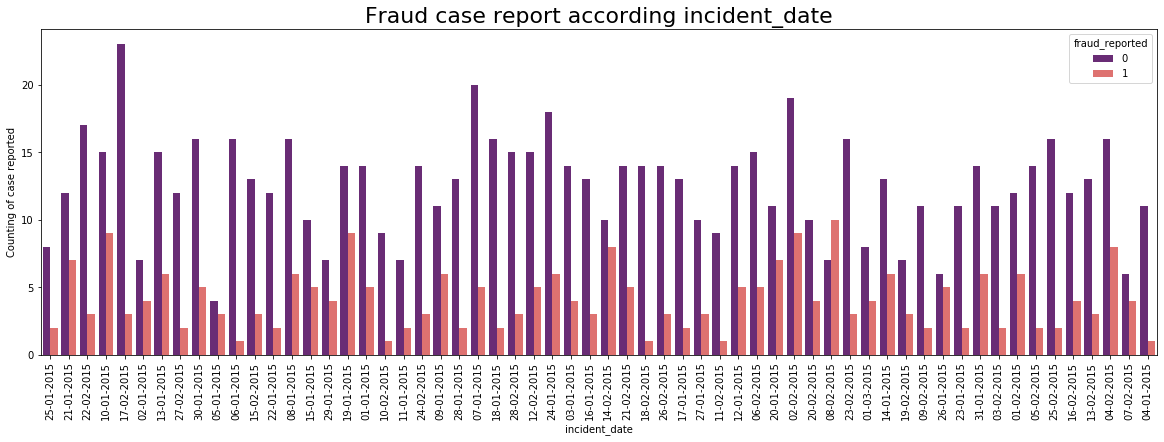

incident_date  fraud_reported
01-01-2015     0                 14
               1                  5
01-02-2015     0                 12
               1                  6
01-03-2015     0                  8
                                 ..
29-01-2015     1                  4
30-01-2015     0                 16
               1                  5
31-01-2015     0                 14
               1                  6
Name: fraud_reported, Length: 120, dtype: int64


In [185]:
#incident_date vs Fraud case reported

plt.figure(figsize=(20, 6))
sns.countplot(x='incident_date', hue='fraud_reported', data=df, palette='magma')
plt.title("Fraud case report according incident_date", fontsize=22)
plt.ylabel("Counting of case reported")
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('incident_date')['fraud_reported'].value_counts())

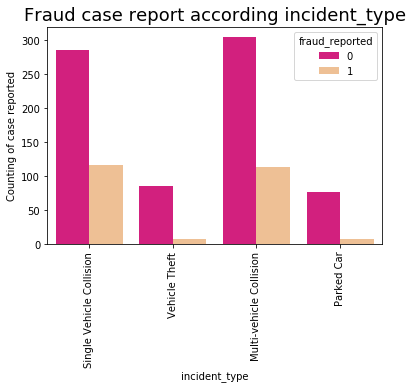

incident_type             fraud_reported
Multi-vehicle Collision   0                 305
                          1                 114
Parked Car                0                  76
                          1                   8
Single Vehicle Collision  0                 286
                          1                 117
Vehicle Theft             0                  86
                          1                   8
Name: fraud_reported, dtype: int64


In [186]:
#incident_type vs Fraud case reported

sns.countplot(x='incident_type', hue='fraud_reported', data=df, palette='Accent_r')
plt.title("Fraud case report according incident_type", fontsize=18)
plt.ylabel("Counting of case reported")
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('incident_type')['fraud_reported'].value_counts())

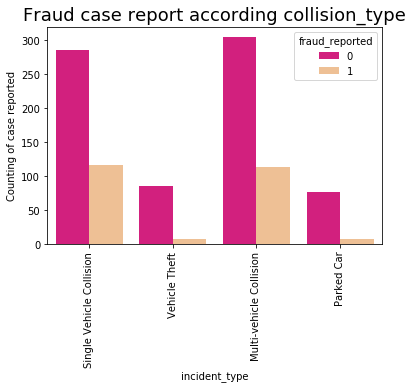

collision_type   fraud_reported
Front Collision  0                 184
                 1                  70
Rear Collision   0                 363
                 1                 107
Side Collision   0                 206
                 1                  70
Name: fraud_reported, dtype: int64


In [187]:
#collision_type vs Fraud case reported

sns.countplot(x='incident_type', hue='fraud_reported', data=df, palette='Accent_r')
plt.title("Fraud case report according collision_type", fontsize=18)
plt.ylabel("Counting of case reported")
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('collision_type')['fraud_reported'].value_counts())

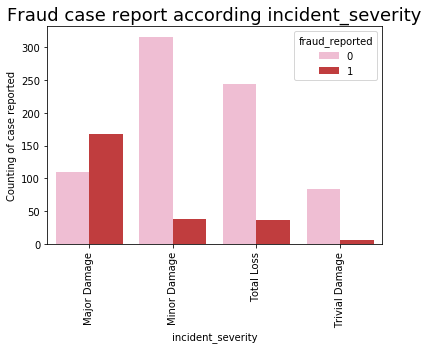

incident_severity  fraud_reported
Major Damage       1                 167
                   0                 109
Minor Damage       0                 316
                   1                  38
Total Loss         0                 244
                   1                  36
Trivial Damage     0                  84
                   1                   6
Name: fraud_reported, dtype: int64


In [188]:
#incident_severity vs Fraud case reported

sns.countplot(x='incident_severity', hue='fraud_reported', data=df, palette='tab20_r')
plt.title("Fraud case report according incident_severity", fontsize=18)
plt.ylabel("Counting of case reported")
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('incident_severity')['fraud_reported'].value_counts())

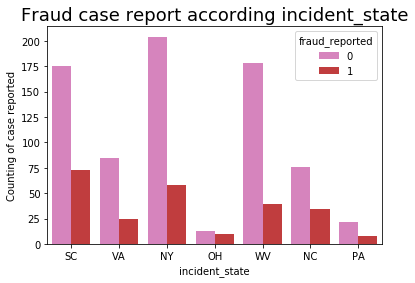

incident_state  fraud_reported
NC              0                  76
                1                  34
NY              0                 204
                1                  58
OH              0                  13
                1                  10
PA              0                  22
                1                   8
SC              0                 175
                1                  73
VA              0                  85
                1                  25
WV              0                 178
                1                  39
Name: fraud_reported, dtype: int64


In [189]:
#incident_state vs Fraud case reported

sns.countplot(x='incident_state', hue='fraud_reported', data=df, palette='tab10_r')
plt.title("Fraud case report according incident_state", fontsize=18)
plt.ylabel("Counting of case reported")
plt.show()

print(df.groupby('incident_state')['fraud_reported'].value_counts())

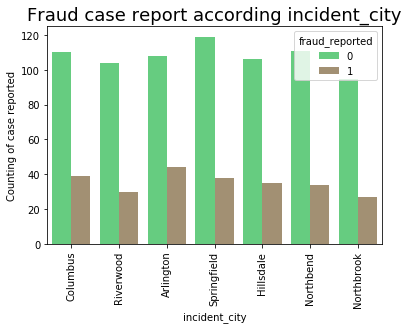

incident_city  fraud_reported
Arlington      0                 108
               1                  44
Columbus       0                 110
               1                  39
Hillsdale      0                 106
               1                  35
Northbend      0                 111
               1                  34
Northbrook     0                  95
               1                  27
Riverwood      0                 104
               1                  30
Springfield    0                 119
               1                  38
Name: fraud_reported, dtype: int64


In [190]:
#incident_city vs Fraud case reported

sns.countplot(x='incident_city', hue='fraud_reported', data=df, palette='terrain')
plt.title("Fraud case report according incident_city", fontsize=18)
plt.ylabel("Counting of case reported")
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('incident_city')['fraud_reported'].value_counts())

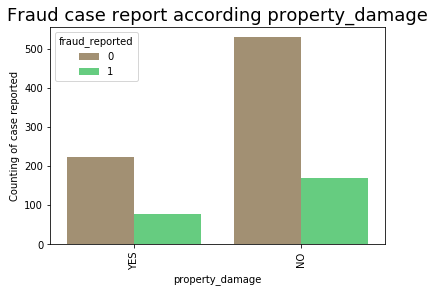

property_damage  fraud_reported
NO               0                 529
                 1                 169
YES              0                 224
                 1                  78
Name: fraud_reported, dtype: int64


In [191]:
#property_damage vs Fraud case reported

sns.countplot(x='property_damage', hue='fraud_reported', data=df, palette='terrain_r')
plt.title("Fraud case report according property_damage", fontsize=18)
plt.ylabel("Counting of case reported")
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('property_damage')['fraud_reported'].value_counts())

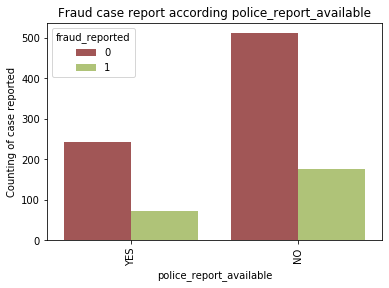

police_report_available  fraud_reported
NO                       0                 511
                         1                 175
YES                      0                 242
                         1                  72
Name: fraud_reported, dtype: int64


In [192]:
#police_report_available vs Fraud case reported

sns.countplot(x='police_report_available', hue='fraud_reported', data=df, palette='tab20b_r')
plt.title("Fraud case report according police_report_available")
plt.ylabel("Counting of case reported")
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('police_report_available')['fraud_reported'].value_counts())

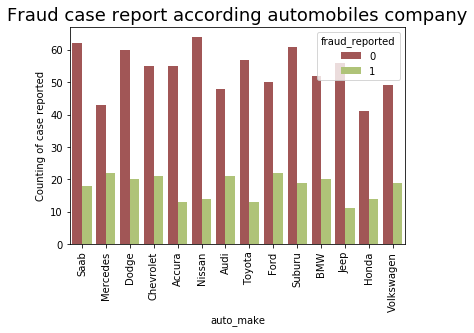

auto_make   fraud_reported
Accura      0                 55
            1                 13
Audi        0                 48
            1                 21
BMW         0                 52
            1                 20
Chevrolet   0                 55
            1                 21
Dodge       0                 60
            1                 20
Ford        0                 50
            1                 22
Honda       0                 41
            1                 14
Jeep        0                 56
            1                 11
Mercedes    0                 43
            1                 22
Nissan      0                 64
            1                 14
Saab        0                 62
            1                 18
Suburu      0                 61
            1                 19
Toyota      0                 57
            1                 13
Volkswagen  0                 49
            1                 19
Name: fraud_reported, dtype: int64


In [193]:
#automobiles company vs Fraud case reported

sns.countplot(x='auto_make', hue='fraud_reported', data=df, palette='tab20b_r')
plt.title("Fraud case report according automobiles company", fontsize=18)
plt.ylabel("Counting of case reported")
plt.xticks(rotation='vertical')
plt.show()

print(df.groupby('auto_make')['fraud_reported'].value_counts())

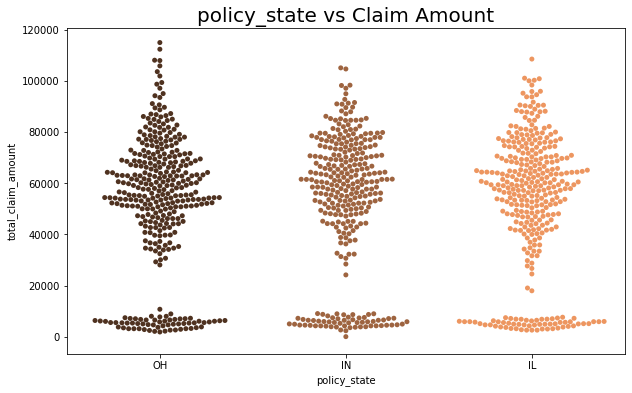

In [194]:
#policy state vs claim amount
plt.figure(figsize=(10, 6))
sns.swarmplot(df['policy_state'], df['total_claim_amount'], palette='copper')
plt.title('policy_state vs Claim Amount', fontsize=20)
plt.show()

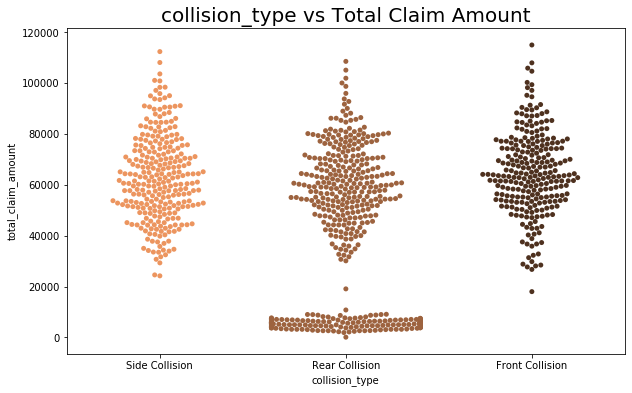

In [195]:
#collision type vs Claim Amount

plt.figure(figsize=(10, 6))
sns.swarmplot(df['collision_type'], df['total_claim_amount'], palette='copper_r')
plt.title('collision_type vs Total Claim Amount', fontsize=20)
plt.show()

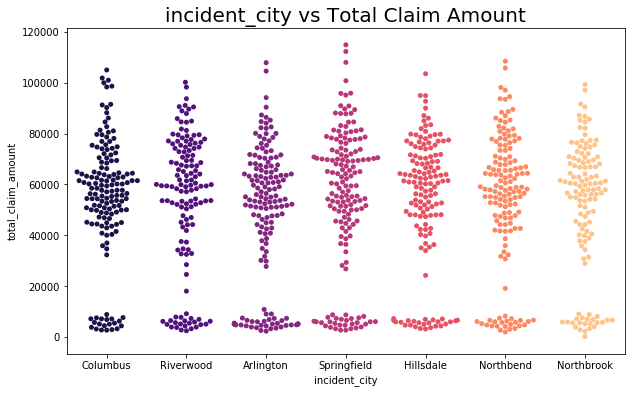

In [196]:
#collision type vs Claim Amount

plt.figure(figsize=(10, 6))
sns.swarmplot(df['incident_city'], df['total_claim_amount'], palette='magma')
plt.title('incident_city vs Total Claim Amount', fontsize=20)
plt.show()

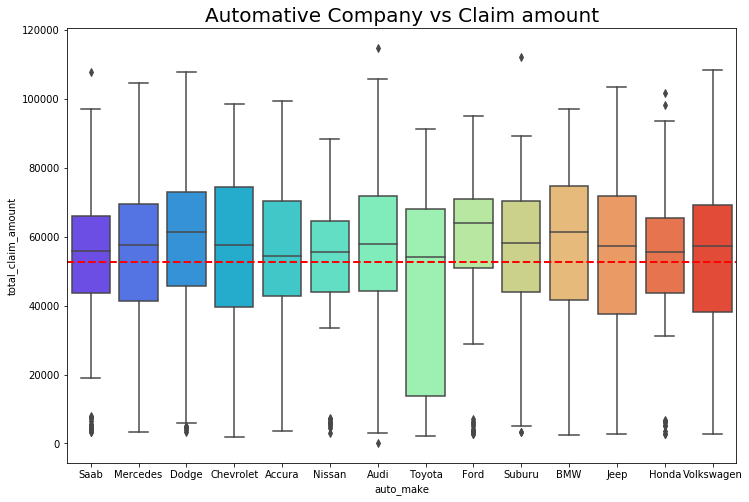

In [197]:
#Total amount claimvs Automobile Company
plt.figure(figsize=(12, 8))
mean_amount=np.mean(df['total_claim_amount'])
sns.boxplot(y='total_claim_amount', x='auto_make', data=df, palette='rainbow')
plt.axhline(mean_amount, color='r', linestyle='dashed', linewidth=2)
plt.title("Automative Company vs Claim amount", fontsize=20)
plt.show()

Observation

From the above graph it is clearly shown that mean of claim amount is nearly same for every automobiles company there are some above and low claim amount present in Honda, Audi and Saab which may be outliers.

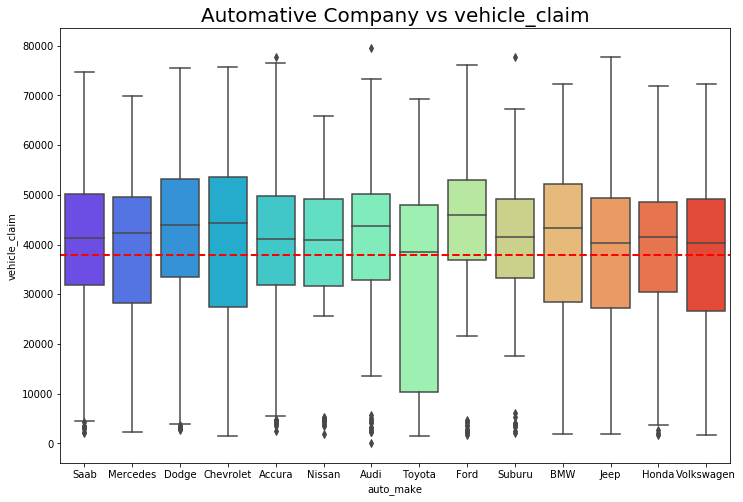

In [198]:
#Total amount claimvs Automobile Company
plt.figure(figsize=(12, 8))
mean_amount=np.mean(df['vehicle_claim'])
sns.boxplot(y='vehicle_claim', x='auto_make', data=df, palette='rainbow')
plt.axhline(mean_amount, color='r', linestyle='dashed', linewidth=2)
plt.title("Automative Company vs vehicle_claim", fontsize=20)
plt.show()

# Multivariate Analysis

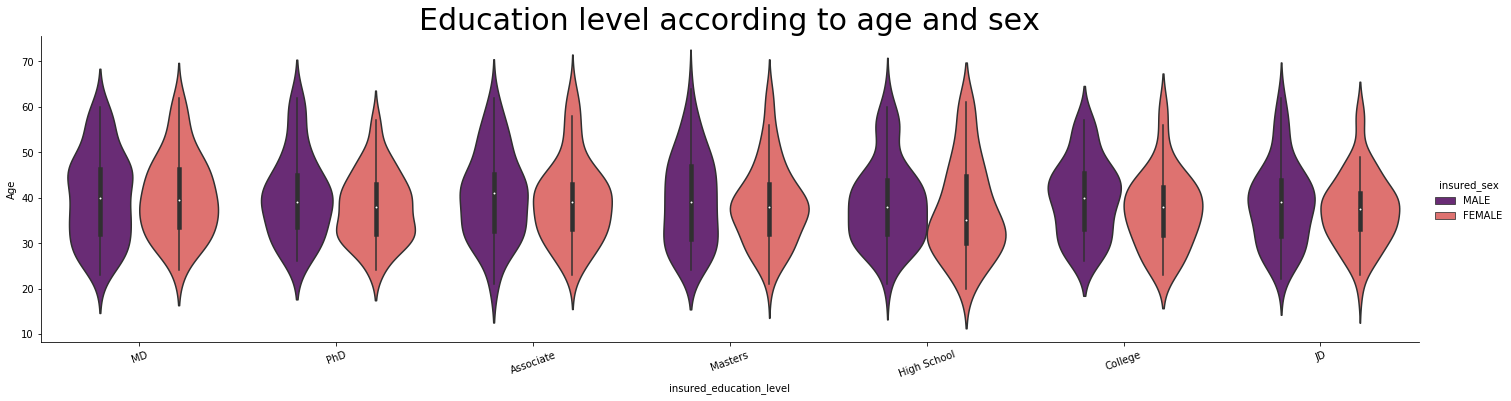

In [199]:
sns.factorplot(x='insured_education_level', y='age', hue='insured_sex', data=df, kind='violin', size=5, palette='magma', aspect=4)
plt.title('Education level according to age and sex', fontsize=30)
plt.xticks(rotation=20)
plt.ylabel("Age")
plt.show()

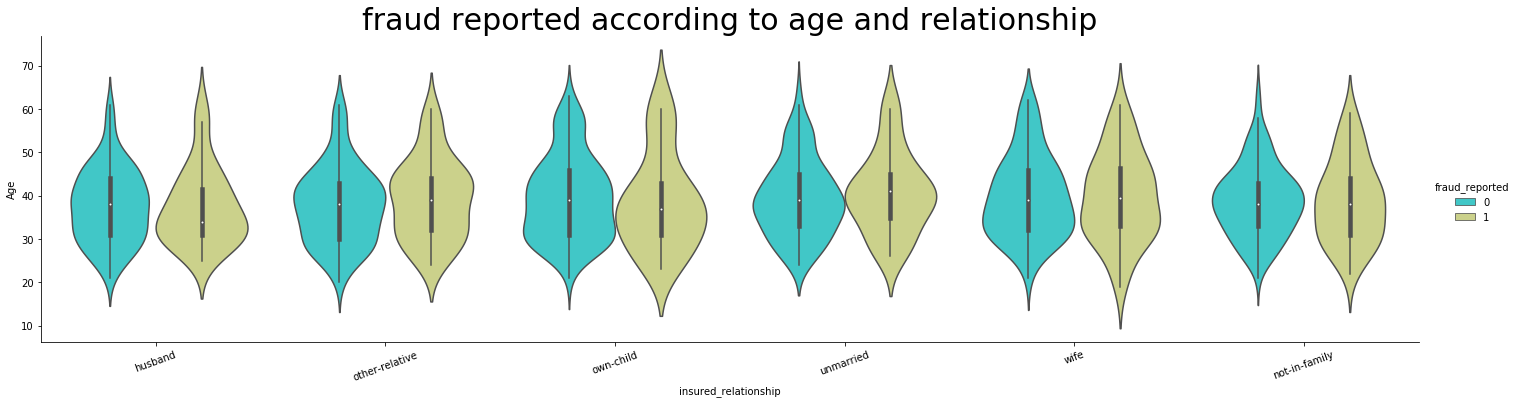

In [200]:
sns.factorplot(x='insured_relationship', y='age', hue='fraud_reported', data=df, kind='violin', size=5, palette='rainbow', aspect=4)
plt.title('fraud reported according to age and relationship', fontsize=30)
plt.xticks(rotation=20)
plt.ylabel("Age")
plt.show()

# Checking the skewness

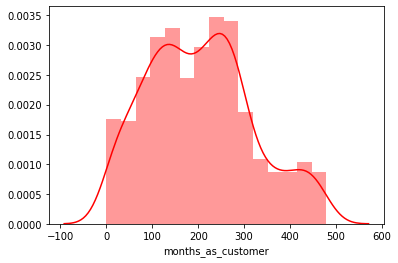

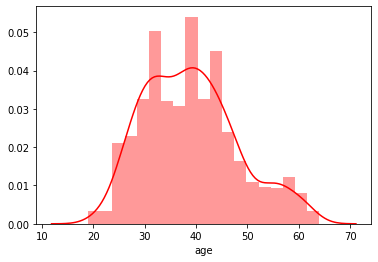

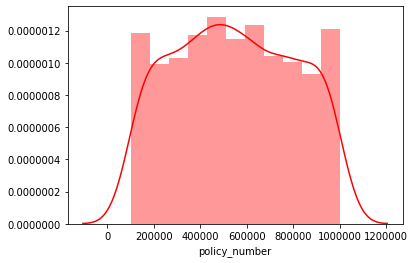

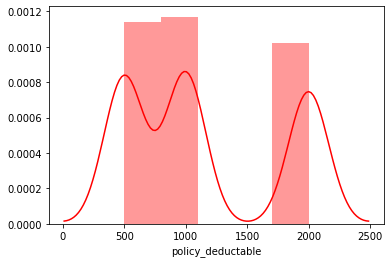

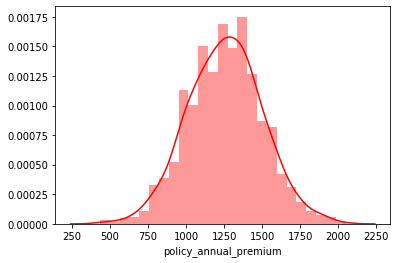

RuntimeError: Selected KDE bandwidth is 0. Cannot estiamte density.

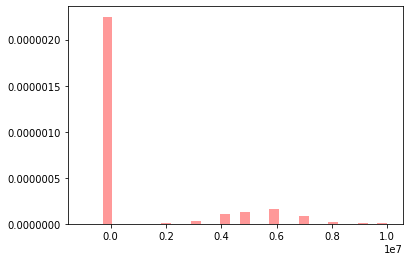

In [201]:
for col in df.describe().columns:
    sns.distplot(df[col], color='r')
    plt.show()

In [202]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.816554
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64

In [203]:
#removing skewness via log metod
df['insured_zip']=np.log(df['insured_zip'])

In [204]:
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_number                  0.038991
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
insured_zip                    0.782405
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
bodily_injuries                0.014777
witnesses                      0.019636
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
auto_year                     -0.048289
fraud_reported                 1.175051
dtype: float64

# Converting the categorical data into numeric variables

In [208]:
from sklearn.preprocessing import LabelEncoder
  
# label_encoder object knows how to understand word labels. 
le = LabelEncoder() 
  
for column in df.columns:
    if df[column].dtype==np.number:
        continue
    df[column]=le.fit_transform(df[column])

In [209]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,532,2,1,1,1406.91,1,13.052224,...,2,1,563,258,512,545,10,1,9,1
1,212,23,257,821,1,1,2,1197.22,5,13.056600,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,186,2,0,2,1413.14,5,12.973009,...,3,0,143,337,104,116,4,30,12,0
3,239,22,140,766,0,1,2,1415.74,6,13.318123,...,2,0,451,245,249,521,3,34,19,1
4,212,25,286,181,0,2,1,1583.91,6,13.322371,...,1,0,81,70,36,66,0,31,14,0


# Plotting Outliers

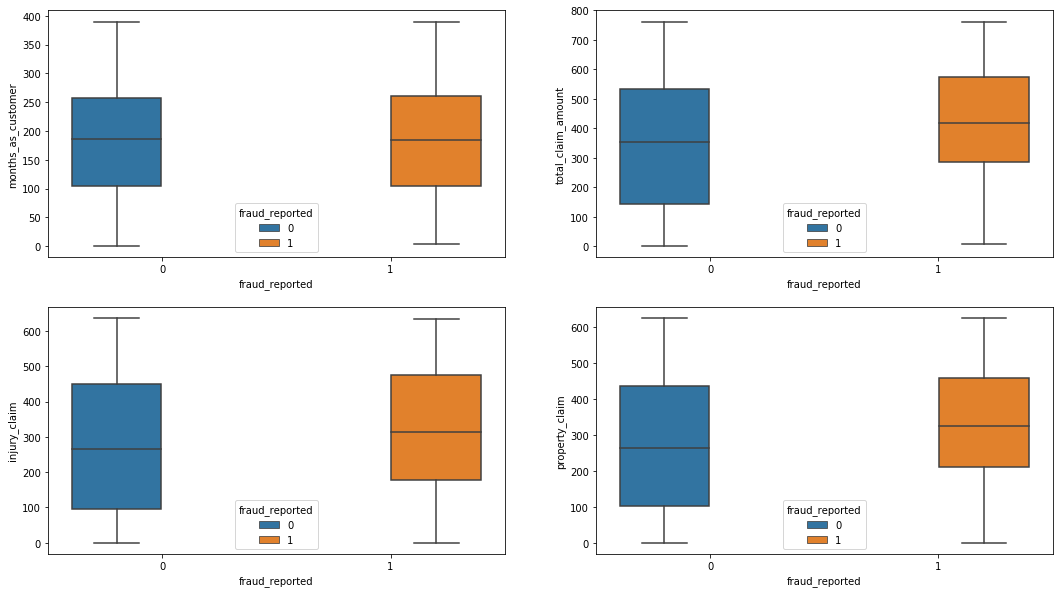

In [212]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
sns.boxplot(ax=ax1, x='fraud_reported', y='months_as_customer', hue='fraud_reported', data=df)
sns.boxplot(ax=ax2, x='fraud_reported', y='total_claim_amount', hue='fraud_reported', data=df)
sns.boxplot(ax=ax3, x='fraud_reported', y='injury_claim', hue='fraud_reported', data=df)
sns.boxplot(ax=ax4, x='fraud_reported', y='property_claim', hue='fraud_reported', data=df)

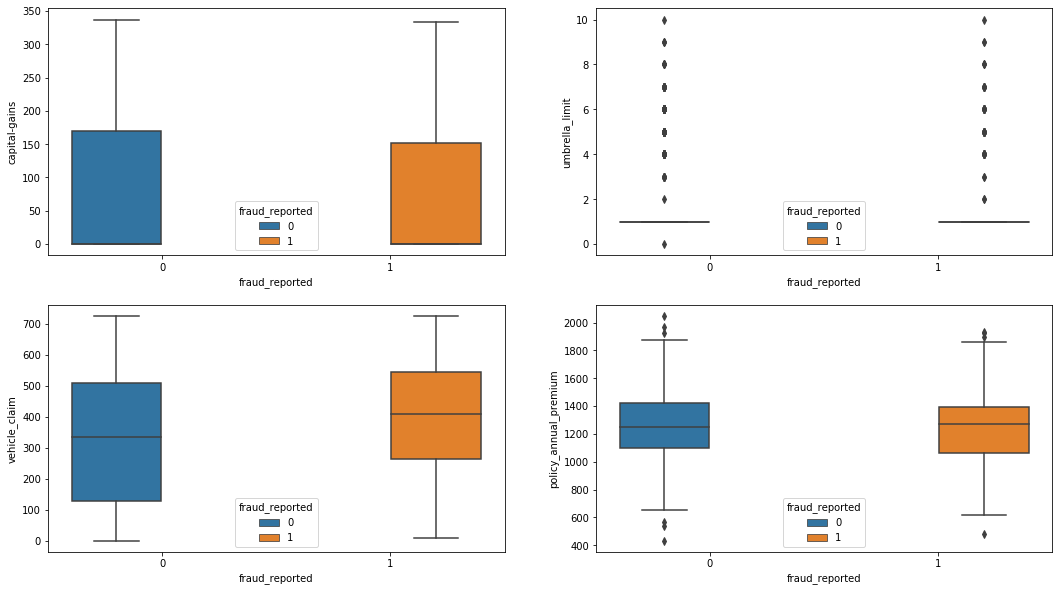

In [213]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(18, 10))
sns.boxplot(ax=ax1, x='fraud_reported', y='capital-gains', hue='fraud_reported', data=df)
sns.boxplot(ax=ax2, x='fraud_reported', y='umbrella_limit', hue='fraud_reported', data=df)
sns.boxplot(ax=ax3, x='fraud_reported', y='vehicle_claim', hue='fraud_reported', data=df)
sns.boxplot(ax=ax4, x='fraud_reported', y='policy_annual_premium', hue='fraud_reported', data=df)

# Removing outliers

In [214]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[1.14895094e+00, 9.90836469e-01, 6.75500153e-02, ...,
        1.64574255e+00, 1.83440399e-01, 1.74601919e+00],
       [2.77600296e-01, 3.34073454e-01, 8.40045062e-01, ...,
        6.57470466e-01, 3.15490877e-01, 1.74601919e+00],
       [6.13781395e-01, 1.08891308e+00, 5.97557827e-01, ...,
        9.59702038e-01, 3.15490877e-01, 5.72731393e-01],
       ...,
       [6.53843494e-01, 5.41610567e-01, 1.39430160e+00, ...,
        2.85700476e-02, 1.51392380e+00, 5.72731393e-01],
       [1.93016186e+00, 2.52328351e+00, 1.73205167e-03, ...,
        1.28637088e+00, 1.18130295e+00, 5.72731393e-01],
       [1.92014633e+00, 2.30436250e+00, 8.14064287e-02, ...,
        6.57470466e-01, 3.15490877e-01, 5.72731393e-01]])

In [215]:
threshold=3
print(np.where(z>3))

(array([ 31,  48,  88, 115, 119, 229, 248, 262, 314, 430, 458, 503, 657,
       700, 763, 875, 922, 975], dtype=int64), array([8, 8, 8, 8, 8, 7, 7, 8, 8, 8, 8, 8, 8, 8, 7, 8, 8, 8], dtype=int64))


In [216]:
df_new=df[(z<3).all(axis=1)]

In [217]:
print(df.shape, '\t', df_new.shape)

(1000, 39) 	 (982, 39)


In [218]:
df=df_new
print(df.shape)

(982, 39)


# Model Training

In [220]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported
0,299,29,480,532,2,1,1,1406.91,1,13.052224,...,2,1,563,258,512,545,10,1,9,1
1,212,23,257,821,1,1,2,1197.22,5,13.056600,...,0,0,44,46,45,38,8,12,12,1
2,123,10,672,186,2,0,2,1413.14,5,12.973009,...,3,0,143,337,104,116,4,30,12,0
3,239,22,140,766,0,1,2,1415.74,6,13.318123,...,2,0,451,245,249,521,3,34,19,1
4,212,25,286,181,0,2,1,1583.91,6,13.322371,...,1,0,81,70,36,66,0,31,14,0


In [221]:
#splitting the data into input and output variable

x=df.drop(columns=['fraud_reported'], axis=1)
x.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year
0,299,29,480,532,2,1,1,1406.91,1,13.052224,...,1,2,1,563,258,512,545,10,1,9
1,212,23,257,821,1,1,2,1197.22,5,13.056600,...,0,0,0,44,46,45,38,8,12,12
2,123,10,672,186,2,0,2,1413.14,5,12.973009,...,2,3,0,143,337,104,116,4,30,12
3,239,22,140,766,0,1,2,1415.74,6,13.318123,...,1,2,0,451,245,249,521,3,34,19
4,212,25,286,181,0,2,1,1583.91,6,13.322371,...,0,1,0,81,70,36,66,0,31,14


In [222]:
y=df['fraud_reported']
y.head()

0    1
1    1
2    0
3    1
4    0
Name: fraud_reported, dtype: int64

In [224]:
#Checking the shape of input and target variable

print(x.shape, '\t\t', y.shape)

(982, 38) 		 (982,)


In [225]:
#scaling in input variables

from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)

In [227]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=.20, random_state=42, stratify=y)

In [228]:
#checking the shape

print(x_train.shape, '\t\t', x_test.shape)

(785, 38) 		 (197, 38)


In [229]:
#Checking the shape

print(y_train.shape, '\t\t', y_test.shape)

(785,) 		 (197,)


In [245]:
#Importing all the model library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

#Importing boosting models
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier

#Importing error metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import GridSearchCV, cross_val_score

In [231]:
#All Algorithm by using for loop

model=[LogisticRegression(), GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(), 
       AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]

for m in model:
    m.fit(x_train, y_train)
    m.score(x_train, y_train)
    predm=m.predict(x_test)
    print('Accuracy score of' , m, 'is:')
    print(accuracy_score(y_test, predm))
    print(confusion_matrix(y_test, predm))
    print(classification_report(y_test, predm))
    print('*********************************************************************')
    print('\n')

Accuracy score of LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) is:
0.7817258883248731
[[138  11]
 [ 32  16]]
              precision    recall  f1-score   support

           0       0.81      0.93      0.87       149
           1       0.59      0.33      0.43        48

    accuracy                           0.78       197
   macro avg       0.70      0.63      0.65       197
weighted avg       0.76      0.78      0.76       197

*********************************************************************


Accuracy score of GaussianNB(priors=None, var_smoothing=1e-09) is:
0.751269035532995
[[121  28]
 [ 21  27]]
              precision    recall  f1-score   support

           0       0.85      0.81      0.83     

In [232]:
#Cross validating the models

models=[LogisticRegression(), GaussianNB(), SVC(), DecisionTreeClassifier(), KNeighborsClassifier(), RandomForestClassifier(), 
       AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]

for m in models:
    score=cross_val_score(m,x,y, cv=15, scoring='accuracy')
    print("Model:", m)
    print("Score:", score)
    print("Mean Score:", score.mean())
    print("Standard deviation:", score.std())
    print('*********************************************************************')
    print('\n')

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
Score: [0.75757576 0.75757576 0.8030303  0.74242424 0.77272727 0.81818182
 0.78787879 0.69230769 0.75384615 0.73846154 0.76923077 0.83076923
 0.8        0.75384615 0.78461538]
Mean Score: 0.770831390831391
Standard deviation: 0.03382121499150532
*********************************************************************


Model: GaussianNB(priors=None, var_smoothing=1e-09)
Score: [0.77272727 0.77272727 0.8030303  0.66666667 0.77272727 0.66666667
 0.71212121 0.72307692 0.72307692 0.69230769 0.72307692 0.84615385
 0.76923077 0.72307692 0.73846154]
Mean Score: 0.7403418803418804
Standard deviation: 0.047793049360333247
*************************************************

Model: LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
[[147   2]
 [ 39   9]]


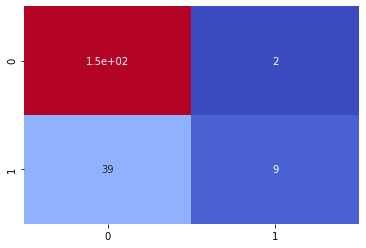



*********************************************************************


Model: GaussianNB(priors=None, var_smoothing=1e-09)
[[147   2]
 [ 39   9]]


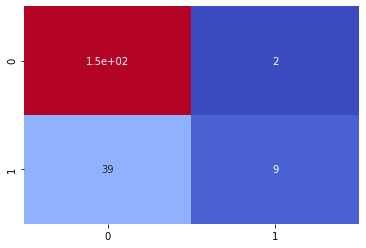



*********************************************************************


Model: SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
[[147   2]
 [ 39   9]]


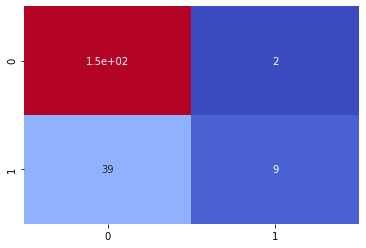



*********************************************************************


Model: DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
[[147   2]
 [ 39   9]]


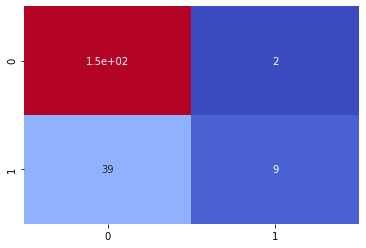



*********************************************************************


Model: KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')
[[147   2]
 [ 39   9]]


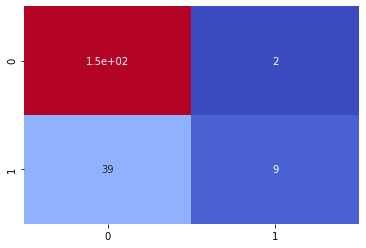



*********************************************************************


Model: RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
[[147   2]
 [ 39   9]]


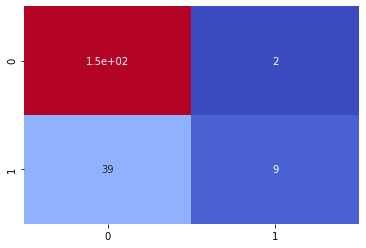



*********************************************************************


Model: AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
[[147   2]
 [ 39   9]]


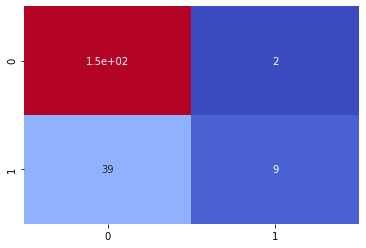



*********************************************************************


Model: GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
[[147   2]
 [ 39   9]]


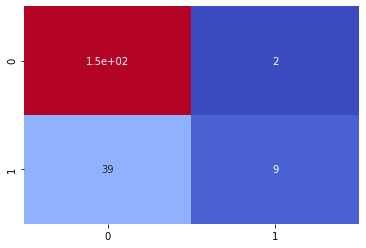



*********************************************************************


Model: BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=10,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
[[147   2]
 [ 39   9]]


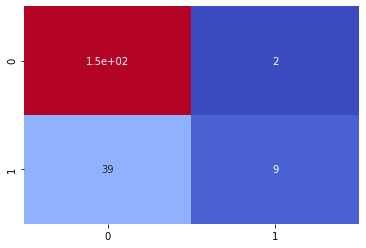



*********************************************************************


Model: ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)
[[147   2]
 [ 39   9]]


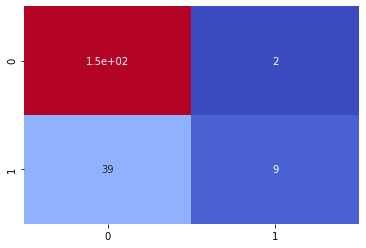



*********************************************************************




In [233]:
#Plotting confusion matrix for models

for m in model:
    print("Model:", m)
    cm=confusion_matrix(y_test, predm)
    sns.heatmap(cm, annot=True, cbar=False, cmap='coolwarm')
    print(confusion_matrix(y_test, predm))
    plt.show()
    print('\n')
    print('*********************************************************************')
    print('\n')

# Using Grid SearchCV to find out parameter 

In [234]:
#Using GridSearchCV to find out the best parameter in LogisticRegression
from sklearn.model_selection import GridSearchCV

parameters={'C':[1, 10], 'random_state':range(42, 56)}
lg=LogisticRegression()

clf=GridSearchCV(lg, parameters)
clf.fit(x, y)
print(clf.best_params_)

{'C': 10, 'random_state': 42}


In [237]:
#Using gridsearch CV to find out best parameters in DecisionTree Classifier

parameters={'criterion':['gini', 'entropy'], 'random_state':range(42, 60)}

dtc=DecisionTreeClassifier()

clf=GridSearchCV(dtc, parameters)
clf.fit(x, y)
print(clf.best_params_)

{'criterion': 'entropy', 'random_state': 56}


In [238]:
#Using gridsearch CV to find out best parameters in Gradient Boosting Classifier

parameters={'criterion':['friedman_mse', 'mse', 'mae'], 'n_estimators':[100, 200, 300]}

gbc=GradientBoostingClassifier()

clf=GridSearchCV(gbc, parameters)
clf.fit(x, y)
print(clf.best_params_)

{'criterion': 'friedman_mse', 'n_estimators': 100}


In [ ]:
Applying results in models

In [244]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc

In [239]:
LR=LogisticRegression(C=10, random_state=42)
DTC=DecisionTreeClassifier(criterion='gini', random_state=47)
GBC=GradientBoostingClassifier(criterion='friedman_mse', random_state=42, learning_rate=0.1, n_estimators=100, max_depth=4)
BC=BaggingClassifier(n_estimators=250)

In [240]:
models=[]
models.append(('LogisticRegression', LR))
models.append(('DecisionTreeClassifier', DTC))
models.append(('GradientBoostingClassifier', GBC))
models.append(('BaggingClassifier', BC))

********************************* LogisticRegression ************************


LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Accuracy Score: 0.7817258883248731


Cross Val Score: 0.7698212898212898


ROC_AUC_Score 0.6297539149888143


[[138  11]
 [ 32  16]]


Classification_report 
               precision    recall  f1-score   support

           0       0.81      0.93      0.87       149
           1       0.59      0.33      0.43        48

    accuracy                           0.78       197
   macro avg       0.70      0.63      0.65       197
weighted avg       0.76      0.78      0.76       197



AxesSubplot(0.125,0.808774;0.775x0.0712264)



********************************* DecisionTreeClassifier ***

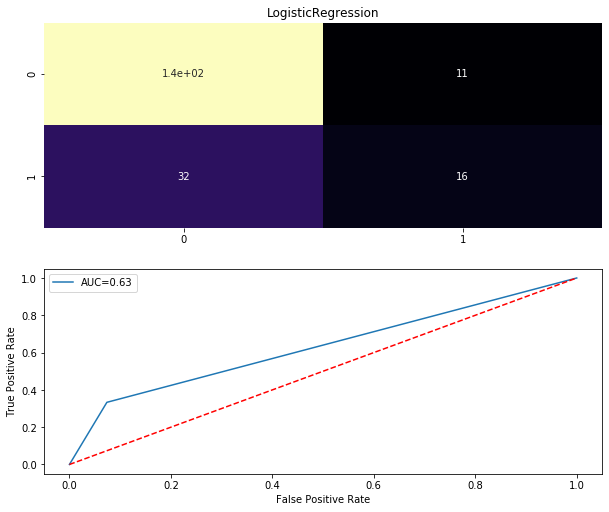

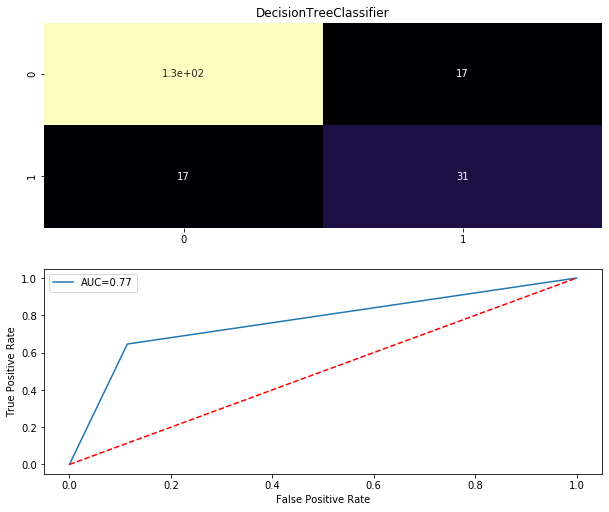

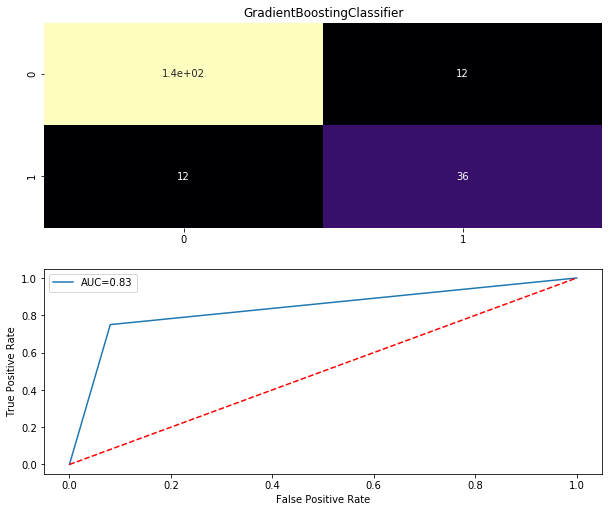

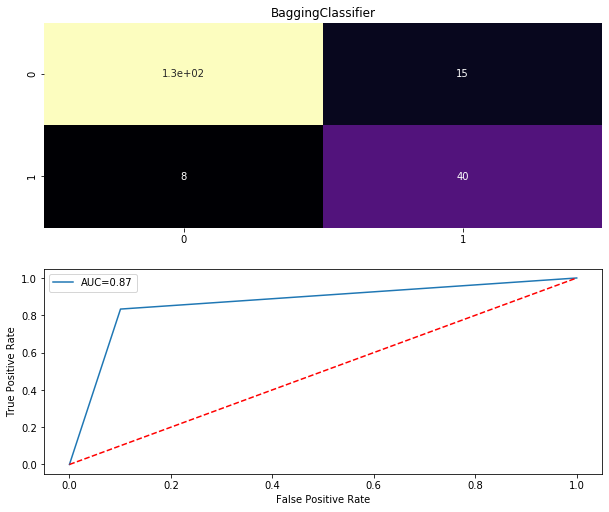

In [248]:
Model=[]
Score=[]
CVS=[]
ROC_Score=[]

for name, model in models:
    print('*********************************', name, '************************')
    print('\n')
    Model.append(name)
    
    model.fit(x_train, y_train)
    print(model)
    pred=model.predict(x_test)
    print('\n')
    
    #Accuracy Score
    AS=accuracy_score(y_test, pred)
    print('Accuracy Score:', AS)
    Score.append(AS*100)
    print('\n')
    
    #Cross val score
    cross_val=cross_val_score(model,x,y,cv=15,scoring='accuracy').mean()
    print('Cross Val Score:', cross_val)
    CVS.append(cross_val*100)
    print('\n')
    
    #ROC_AUC_SCORE
    false_positive_rate, true_positive_rate, threshold=roc_curve(y_test, pred)
    roc_auc=auc(false_positive_rate, true_positive_rate)
    print('ROC_AUC_Score', roc_auc)
    ROC_Score.append(roc_auc*100)
    print('\n')
    
    #Confusion Matrix
    cm=confusion_matrix(y_test, pred)
    print(cm)
    print('\n')
    
    #Classification report
    print('Classification_report \n', classification_report(y_test, pred))
    print('\n')
    
    #Confusionmatrix via Heatmap
    plt.figure(figsize=(10, 40))
    plt.subplot(911)
    plt.title(name)
    print(sns.heatmap(cm, annot=True, cbar=False, cmap='magma'))
    plt.subplot(912)
    
    #ROC Curve
    plt.plot(false_positive_rate, true_positive_rate, label='AUC=%.2f'%roc_auc)
    plt.plot([0,1], [0,1], 'r--')
    plt.legend(loc='Lower right')
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    print('\n\n')

# I choose BaggingClassifier as my final model

In [253]:
#saving this model 

from sklearn.externals import joblib

#saving the model as a pickle in a file
joblib.dump(BC, 'Auto_Insurance_Fraud_BC.csv')

['Auto_Insurance_Fraud_BC.csv']